# Stock Advisor

A simple to use notebook to help you stay informed on stock trends. Object implimentation is at the beginning: examples follow.

In [1]:
#Import lots of stuff
import heapq
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime
from statistics import mode
from scipy import stats
from scipy.stats import anderson
from scipy.stats import shapiro

#trying new plotting library
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

/Users/Razander/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## The simple moving average object
Simple moving average analysis of stocks. Best for trending markets (not sidways/violate markets)

This is a Simple Moving Crossover Trading Strategy (Momentum class of strategies)
The code comes from part of the tutorial form this website:
https://www.datacamp.com/community/tutorials/finance-python-trading#tradingstrategy


In [2]:
class getData:
    def __init__(self, ticker, start, end): #executed when an sma object in created
        self.ticker = ticker   #must be all caps string (e.g. "MSFT")
        self.startDate = start #must be datetime.datetime(yyyy,mm,dd)
        self.endDate = end     #must be datetime.datetime(yyyy,mm,dd)
        
        # Check for valid inputs
        
        if len(self.ticker) < 1: #check for valid ticker
            print("\nInvalid ticker: length is less than 1 character\n")
        
        if(type(end) != datetime.datetime or type(start) != datetime.datetime): #check dates are correct object
            print("\nInvalid date start and/or end object(s): datetime.datetime(yyyy,mm,dd) required for start and end dates\n")
        
        if start>end: #check end is after start
            print("\nInvalid dates: start date is after end date\n")
        
        # Import stock data using pandasreader
        self.df = pdr.get_data_quandl(self.ticker, start=self.startDate, end=self.endDate)
        self.df = self.df.reindex(index=self.df.index[::-1]) #flip index so 0th row is oldest date
    
    def getDf(self):
        return self.df
    
    def viewDFhead(self):
        return self.df.head()
        
    def viewDFtail(self):
        return self.df.tail()
    
    def plotDF(self):
        #iteractive bokeh plot
        output_notebook() #puts plot inside notebook instead of making it in a new browser tab
        p = figure(title=self.ticker,x_axis_type='datetime',y_axis_label='Price $')
        p.line(self.df.index.values,self.df['Close'])
        show(p)
        
        #matplotlib version (not interactive)
        self.df['Close'].plot(grid=True,figsize=(12,8))
        plt.title(ticker)
        plt.ylabel('Price $')
        plt.show()


class sma:
    def __init__(self, df, ticker): #executed when an sma object in created
        self.df = df   #import dataframe
        self.ticker = ticker
        
    def createSMA(self, window): #Calculate SMA for given window_size
        self.window = window
        
        # Initialize the signals DataFrame
        self.signals = pd.DataFrame(index=self.df.index)
        self.signals['signal'] = 0.0

        # Create short simple moving average over the short window
        self.signals['mavg'] = self.df['Close'].rolling(window=self.window, min_periods=1, center=False).mean()
        
    def viewDFhead(self):
        return self.df.head()
        
    def viewDFtail(self):
        return self.df.tail()
    
    def getDF(self):
        return self.df

    def getSMA(self):
        return self.signals
    
    def plotDF(self):
        #iteractive bokeh plot
        output_notebook() #puts plot inside notebook instead of making it in a new browser tab
        p = figure(title=self.ticker,x_axis_type='datetime',y_axis_label='Price $')
        p.line(self.df.index.values,self.df['Close'])
        show(p)
        
        #matplotlib version (not interactive)
        self.df['Close'].plot(grid=True,figsize=(12,8))
        plt.title(ticker)
        plt.ylabel('Price $')
        plt.show()
        
    def plotSMA(self): #plot price with SMA short and long windows. For now, buy sell signals are not included
        fig = plt.figure()
        ax1 = fig.add_subplot(111, ylabel='Price in $')
        self.df['Close'].plot(ax=ax1, color='r', lw=2.)
        self.signals[['mavg']].plot(ax=ax1, lw=2.)
        plt.show()
        
        # Bohek plot (interactive)
        output_notebook() #puts plot inside notebook instead of making it in a new browser tab
        p = figure(title=self.ticker,x_axis_type='datetime',y_axis_label='Price $')
        p.line(self.df.index.values,self.df['Close'],color = 'red',legend='Close')
        p.line(self.df.index.values,self.signals['mavg'], color='green',legend=str(self.window))
        p.legend.click_policy="hide"
        show(p)

In [3]:
#get data
ticker = 'MSFT'
start = datetime.datetime(2016, 1, 10)
end = datetime.datetime(2018, 1, 10)
df = getData(ticker,start,end).getDf()
print(df.tail())
print(df.head())

             Open     High      Low  Close      Volume  ExDividend  \
Date                                                                 
2018-01-04  86.59  87.6600  86.5700  87.11  21145985.0         0.0   
2018-01-05  87.66  88.4100  87.4300  88.19  22526563.0         0.0   
2018-01-08  88.20  88.5800  87.6046  88.28  20293930.0         0.0   
2018-01-09  88.65  88.7272  87.8600  88.22  19390427.0         0.0   
2018-01-10  87.86  88.1900  87.4100  87.82  18129153.0         0.0   

            SplitRatio  AdjOpen  AdjHigh   AdjLow  AdjClose   AdjVolume  
Date                                                                     
2018-01-04         1.0    86.59  87.6600  86.5700     87.11  21145985.0  
2018-01-05         1.0    87.66  88.4100  87.4300     88.19  22526563.0  
2018-01-08         1.0    88.20  88.5800  87.6046     88.28  20293930.0  
2018-01-09         1.0    88.65  88.7272  87.8600     88.22  19390427.0  
2018-01-10         1.0    87.86  88.1900  87.4100     87.82  1812

In [4]:
sma1 = sma(df,ticker)
sma1.getDF()
#sma1.plotDF() #redirects to new page

Open     High      Low   Close      Volume  ExDividend  \
Date                                                                   
2016-01-11  52.510  52.8500  51.4600  52.300  36943756.0        0.00   
2016-01-12  52.760  53.1000  52.0600  52.780  36095539.0        0.00   
2016-01-13  53.800  54.0700  51.3038  51.640  66883571.0        0.00   
2016-01-14  52.000  53.4163  51.5700  53.110  52381918.0        0.00   
2016-01-15  51.310  51.9700  50.3400  50.990  71820697.0        0.00   
2016-01-19  51.480  51.6800  50.0600  50.560  43564538.0        0.00   
2016-01-20  49.980  51.3800  49.1000  50.790  63272993.0        0.00   
2016-01-21  51.000  51.5800  50.3000  50.480  40191157.0        0.00   
2016-01-22  51.410  52.3300  51.2600  52.290  37555789.0        0.00   
2016-01-25  51.940  52.6500  51.6500  51.790  34707717.0        0.00   
2016-01-26  51.790  52.4400  51.5500  52.170  28900820.0        0.00   
2016-01-27  52.010  52.2000  51.0201  51.220  36775194.0        0.00   
2016-01-28  51.860  52.2100  51.2500  52.055  62513789.0        0.00   
2016-01-29  54.730  55.0900  54.0000  55.090  83611686.0        0.00   
2016-02-01  54.880  55.0900  54.4950  54.710  44208542.0        0.00   
2016-02-02  54.170  54.2600  52.6500  53.000  56313753.0        0.00   
2016-02-03  53.250  53.3900  51.2600  52.160  57559814.0        0.00   
2016-02-04  52.100  52.8100  51.3700  52.000  46987123.0        0.00   
2016-02-05  51.940  52.0000  49.5600  50.160  62008994.0        0.00   
2016-02-08  49.550  49.5700  48.1900  49.410  59290497.0        0.00   
2016-02-09  49.020  50.2400  48.6700  49.280  46740474.0        0.00   
2016-02-10  49.890  50.3900  49.5200  49.710  38236954.0        0.00   
2016-02-11  48.680  50.1100  48.5100  49.690  48878571.0        0.00   
2016-02-12  50.250  50.6800  49.7500  50.500  34243324.0        0.00   
2016-02-16  50.900  51.0900  50.1300  51.090  37291208.0        0.36   
2016-02-17  51.490  52.7700  51.4500  52.420  40788968.0        0.00   
2016-02-18  52.330  52.9500  52.1000  52.190  27176035.0        0.00   
2016-02-19  51.970  52.2800  51.5300  51.820  33559073.0        0.00   
2016-02-22  52.280  53.0000  52.2800  52.650  25008291.0        0.00   
2016-02-23  52.340  52.3700  50.9800  51.180  28895274.0        0.00   
...            ...      ...      ...     ...         ...         ...   
2017-11-28  84.070  85.0600  84.0200  84.880  21162639.0        0.00   
2017-11-29  84.710  84.9172  83.1750  83.340  26401761.0        0.00   
2017-11-30  83.510  84.5200  83.3400  84.170  32074914.0        0.00   
2017-12-01  83.600  84.8100  83.2200  84.260  29113662.0        0.00   
2017-12-04  84.420  84.4299  80.7000  81.080  37977732.0        0.00   
2017-12-05  81.340  82.6800  80.9801  81.590  25512120.0        0.00   
2017-12-06  81.550  83.1400  81.4300  82.780  24821403.0        0.00   
2017-12-07  82.540  82.8000  82.0000  82.490  20378114.0        0.00   
2017-12-08  83.630  84.5800  83.3300  84.160  23825056.0        0.00   
2017-12-11  84.290  85.3700  84.1200  85.230  19909119.0        0.00   
2017-12-12  85.310  86.0500  85.0800  85.580  23534946.0        0.00   
2017-12-13  85.740  86.0000  85.1700  85.350  21307911.0        0.00   
2017-12-14  85.430  85.8739  84.5300  84.690  19080106.0        0.00   
2017-12-15  85.260  87.0900  84.8800  86.850  52430167.0        0.00   
2017-12-18  87.120  87.4999  86.2300  86.380  21551076.0        0.00   
2017-12-19  86.350  86.3500  85.2700  85.830  23241979.0        0.00   
2017-12-20  86.200  86.3000  84.7100  85.520  23425009.0        0.00   
2017-12-21  86.050  86.1000  85.4000  85.500  16638402.0        0.00   
2017-12-22  85.400  85.6300  84.9200  85.510  14033977.0        0.00   
2017-12-26  85.310  85.5346  85.0300  85.400   9737412.0        0.00   
2017-12-27  85.650  85.9800  85.2150  85.710  13000828.0        0.00   
2017-12-28  85.900  85.9300  85.5500  85.720   9872795.0        0.00   
2017-12-29  85.630  86.0500  85.5000  85.540  18162779

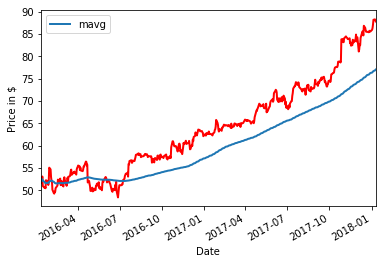

Loading BokehJS ...

In [5]:
sma1.createSMA(151)
sma1.plotSMA()

In [6]:
#Include more tests?

#checks normality of distribution make from closing price normalized to SMA
def checkNormality(sma_temp,window):
    sma_temp.createSMA(window)
    signals = sma_temp.getSMA()
    df2 = sma_temp.getDF()

    norm_data = df2['Close']-signals['mavg']
    
    #confidence level
    alpha = 0.001

    # null hypothesis: x comes from a normal distribution
    # null hypothesis rejection tracker: 0 -> fail to reject 1 -> reject
    tracker = []
    
    # D'Agostino normality test
    k2, p = stats.normaltest(norm_data)
    #print("p = {:g}".format(p))
    if p > alpha:
        tracker.append(0)
        #print('May be normal (fail to reject)')
    else:
        tracker.append(1)
        #print('Is not normal (reject)')
    
    # Shapiro normality test
    stat, p = shapiro(norm_data)
    #print('Statistics=%.5f, p=%.5f' % (stat, p))
    if p > alpha:
        tracker.append(0)
        #print('May be normal (fail to reject)')
    else:
        tracker.append(1)
        #print('Is not normal (reject)')
    return tracker, norm_data

drop stock
10


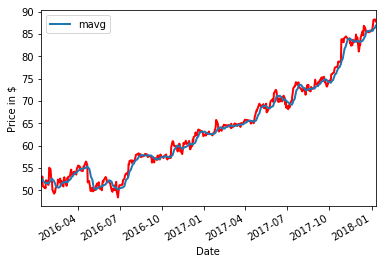

Loading BokehJS ...

In [7]:
#Make normal distribution; count down from 365 and select largest window that is normal
#If distribution passes both tests, we'll call that normal

found = False

for i in range(365,9,-1): #check windows from 365 to 10
    reject, norm_data = checkNormality(sma1,i)
    if sum(reject) == 0:
        found = True
        break
        
window = i

if found:
    print('largest window with normal distribution: ',window)
    norm_data.hist()
else:
    print('drop stock')
    print(window)
    
sma1.createSMA(window)
sma1.plotSMA()

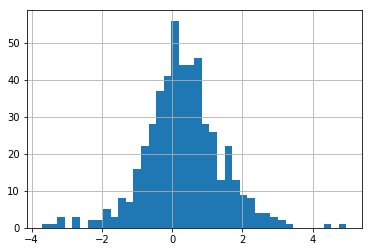

In [8]:
norm_data.hist(bins=40)

count    504.000000
mean       0.315268
std        1.090284
min       -3.704000
25%       -0.311500
50%        0.252000
75%        0.896250
max        4.964000
dtype: float64

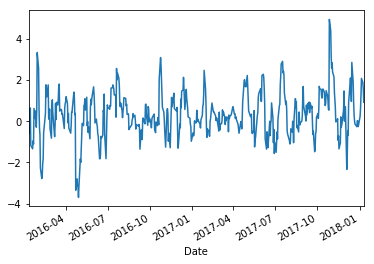

In [9]:
norm_data.plot()
norm_data.describe()

In [10]:
def buySignal(norm_data,sma_temp):
    #get normal distribution statistics
    ave = norm_data.describe()[1]
    low25 = norm_data.describe()[4]
    high75 = norm_data.describe()[6]
    
    #get moving average value for today
    mavg = sma_temp.getSMA()['mavg']
    today_sma = mavg[-1]
    
    #get today's price
    df = sma_temp.getDF()['Close']
    today_price = df[-1]
    
    #show data
    #print("today's price:\t\t",today_price)
    #print("expected value from sma: {:.4}".format(ave+today_sma))
    #print("expected 75% from sma:   {:.4}".format(high75+today_sma))
    
    #we want to buy if the price is > sma and < one standard deviation above the smagoing up past the average toward the 75% percentile
    if today_price > ave+today_sma and today_price < high75+today_sma:
        return "buy"
    else:
        return "Don't buy"

In [11]:
print(buySignal(norm_data,sma1))

Don't buy


In [12]:
#group each step together
#get data
ticker = 'MSFT'
start = datetime.datetime(2016, 1, 10)
end = datetime.datetime(2018, 1, 10)
df = getData(ticker,start,end).getDf()
#print(df.tail())
#print(df.head())

#make sma
Sma = sma(df,ticker)
guess = 20
Sma.createSMA(guess)

#Make normal distribution; count down from 365/ and select largest window that is normal
#If distribution passes both tests, we'll call that normal
found = False
for i in range(365,9,-1): #check windows from 365 to 10
    reject, norm_data = checkNormality(sma1,i)
    if sum(reject) == 0:
        found = True
        break
window = i
if found:
    print('largest window with normal distribution: ',window)
else:
    print('window:',window)
sma1.createSMA(window)
print(buySignal(norm_data,sma1))

window: 10
Don't buy


Test effectiveness of model. Measure of effectiveness: shortest number of days until 5% profit (or greater). If signal returns -99, the buy (as of today) would not have returned 5%
1. Move through dates (365 day window, one day at a time (earliest day in data would be "yesterday")
2. Generate buy signal for "today"
3. If buy signal, search "future" days until price is greater than 5% "yesterday" (assuming that's close to what we would have bought at "today")
4. If 5% gain is reached, store number of days to get there
5. If 5% gain never reached, return -99 as error code


In [ ]:
start_date = datetime.datetime(2017, 1, 10)
datetime.datetime(2018, 1, 10).strftime("%Y-%m-%d")

In [14]:
df.loc['2017-11-01':'2018-01-05'].tail()

Open   High    Low  Close      Volume  ExDividend  SplitRatio  \
Date                                                                          
2017-12-29  85.630  86.05  85.50  85.54  18162779.0         0.0         1.0   
2018-01-02  86.125  86.31  85.50  85.95  21993101.0         0.0         1.0   
2018-01-03  86.055  86.51  85.97  86.35  24173064.0         0.0         1.0   
2018-01-04  86.590  87.66  86.57  87.11  21145985.0         0.0         1.0   
2018-01-05  87.660  88.41  87.43  88.19  22526563.0         0.0         1.0   

            AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
Date                                                        
2017-12-29   85.630    86.05   85.50     85.54  18162779.0  
2018-01-02   86.125    86.31   85.50     85.95  21993101.0  
2018-01-03   86.055    86.51   85.97     86.35  24173064.0  
2018-01-04   86.590    87.66   86.57     87.11  21145985.0  
2018-01-05   87.660    88.41   87.43     88.19  22526563.0

In [92]:
def daysUntilGains(yesterday,df):
    gain = 1.05
    price = df.loc[yesterday.strftime("%Y-%m-%d")]['Close']
    df_higherprices = df.loc[df['Close'] > price*gain]
        
    if df_higherprices.empty:
        print('no higher prices, no profit')
        return -99
    else:
        #print(df_higherprices.head(1).index[0].to_pydatetime().strftime("%Y-%m-%d"))
        delta = df_higherprices.head(1).index[0].to_pydatetime() - yesterday
        return delta.days

In [47]:
#some hyperparameters and data importing
epochs = 100
ticker = 'MSFT'
start = datetime.datetime(2016, 1, 10)
end = datetime.datetime(2018,1,10)
df_master = getData(ticker,start,end).getDf()

In [48]:
df_master.tail()

Open     High      Low  Close      Volume  ExDividend  \
Date                                                                 
2018-01-04  86.59  87.6600  86.5700  87.11  21145985.0         0.0   
2018-01-05  87.66  88.4100  87.4300  88.19  22526563.0         0.0   
2018-01-08  88.20  88.5800  87.6046  88.28  20293930.0         0.0   
2018-01-09  88.65  88.7272  87.8600  88.22  19390427.0         0.0   
2018-01-10  87.86  88.1900  87.4100  87.82  18129153.0         0.0   

            SplitRatio  AdjOpen  AdjHigh   AdjLow  AdjClose   AdjVolume  
Date                                                                     
2018-01-04         1.0    86.59  87.6600  86.5700     87.11  21145985.0  
2018-01-05         1.0    87.66  88.4100  87.4300     88.19  22526563.0  
2018-01-08         1.0    88.20  88.5800  87.6046     88.28  20293930.0  
2018-01-09         1.0    88.65  88.7272  87.8600     88.22  19390427.0  
2018-01-10         1.0    87.86  88.1900  87.4100     87.82  18129153.0

In [91]:
buySignals = []
daysUntilProfit = []
for j in range(epochs):    
    #adjust time period
    daysBack = datetime.timedelta(days=epochs-j)
    start = datetime.datetime(2017, 1, 10) - daysBack
    yesterday = datetime.datetime(2018,1,10) - daysBack
    
    #adjust data set for new time frame
    df = df_master.loc[start.strftime("%Y-%m-%d"):yesterday.strftime("%Y-%m-%d")]
    
    #initialize sma
    Sma = sma(df,ticker)

    #Make normal distribution; count down from 365 and select largest window that is normal
    found = False
    for i in range(365,9,-1): #check windows from 365 to 10
        reject, norm_data = checkNormality(Sma,i)
        if sum(reject) == 0:
            found = True
            break
    window = i
    if not found:
        print('rejected',yesterday)
        continue #skip to next iteration in for loop if window is <= 10 or is rejected by normality tests
    
    #create sma on best normal window
    Sma.createSMA(window)
    
    #convert signal into 1 or 0. If buy, signal 1
    if(buySignal(norm_data,Sma)=="buy"):
        buySignals.append(1)
        #find future 5% gains
        days = daysUntilGains(yesterday,df_master.loc[yesterday.strftime("%Y-%m-%d"):])
        daysUntilProfit.append([days,yesterday])
    else:
        buySignals.append(0)

yesterday 2017-10-02 00:00:00 price: 74.61
5% higher price exists! What is that date?
yesterday 2017-10-03 00:00:00 price: 74.26
5% higher price exists! What is that date?
yesterday 2017-10-04 00:00:00 price: 74.69
5% higher price exists! What is that date?
rejected 2017-10-30 00:00:00
rejected 2017-10-31 00:00:00
rejected 2017-11-01 00:00:00
rejected 2017-11-02 00:00:00
rejected 2017-11-03 00:00:00
rejected 2017-11-04 00:00:00
rejected 2017-11-05 00:00:00
rejected 2017-11-06 00:00:00
rejected 2017-11-07 00:00:00
rejected 2017-11-08 00:00:00
rejected 2017-11-09 00:00:00
rejected 2017-11-10 00:00:00
rejected 2017-11-11 00:00:00
rejected 2017-11-12 00:00:00
rejected 2017-11-13 00:00:00
rejected 2017-11-14 00:00:00
rejected 2017-11-15 00:00:00
rejected 2017-11-16 00:00:00
rejected 2017-11-17 00:00:00
rejected 2017-11-18 00:00:00
rejected 2017-11-19 00:00:00
rejected 2017-11-20 00:00:00
rejected 2017-11-21 00:00:00
rejected 2017-11-22 00:00:00
rejected 2017-11-23 00:00:00
rejected 2017-11-

In [93]:
sum(buySignals)

3

In [94]:
daysUntilProfit

[[18, datetime.datetime(2017, 10, 2, 0, 0)],
 [17, datetime.datetime(2017, 10, 3, 0, 0)],
 [16, datetime.datetime(2017, 10, 4, 0, 0)]]